# Task 2 - A/B Testing 
 
1. An A/B email test was sent on 10/31/2020. Which message can be deemed a winner based on the donation activity of who received each email in the 7 days following the send?

2. If there is a winner, why? If there isn’t, what conditions would need to exist to determine a winner?

In the send tab, there is a record for each email send ID and each recipient ID for all emails sent on 10/31. The send IDs for the test emails are as follows:

    A Email -> 44916
    B Email -> 44915
The donations tab is the record of all donations for the first week in November (along with their email ID)

In [1]:
#importing needed packages
import pandas as pd
import math
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
%matplotlib inline


Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20210315151358-0001
KERNEL_ID = 5da41d0f-4ebe-4fd6-83c5-6ab89a1a8538


In [2]:
#Importing data 

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_71dba5ad40024717b35ee6d7f904e2f1 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_71dba5ad40024717b35ee6d7f904e2f1 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_71dba5ad40024717b35ee6d7f904e2f1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Z0m_fT5O61zROpkP_-NofZsnsyzBMJ1a2Glz_VXUq_K6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_71dba5ad40024717b35ee6d7f904e2f1)

body = client_71dba5ad40024717b35ee6d7f904e2f1.get_object(Bucket='abtestingtask2-donotdelete-pr-aj35rvdprvmpyr',Key='final_abtest copy.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
abtest = pd.read_csv(body)
abtest.head()


,EmailID,sendID,DonationDate,Group
0,1,44915,11/1/20 0:00,Control
1,2,44916,11/1/20 0:00,Treatment
2,4,44916,11/6/20 0:00,Treatment
3,4,44916,11/1/20 0:00,Treatment
4,7,44915,11/1/20 0:00,Control


In [3]:
#Viewing table

print("Number of rows: ", abtest.shape[0], " Number of columns: ", abtest.shape[1])
abtest.head(20)

Number of rows:  57495  Number of columns:  4


,EmailID,sendID,DonationDate,Group
0,1,44915,11/1/20 0:00,Control
1,2,44916,11/1/20 0:00,Treatment
2,4,44916,11/6/20 0:00,Treatment
3,4,44916,11/1/20 0:00,Treatment
4,7,44915,11/1/20 0:00,Control
5,8,44916,11/1/20 0:00,Treatment
6,10,44915,11/3/20 0:00,Control
7,10,44915,11/1/20 0:00,Control
8,11,44915,11/4/20 0:00,Control
9,11,44915,11/1/20 0:00,Control


In [4]:
abtest["Group"].value_counts()

Treatment     28864
Control       28629
Treatment         1
Control           1
Name: Group, dtype: int64

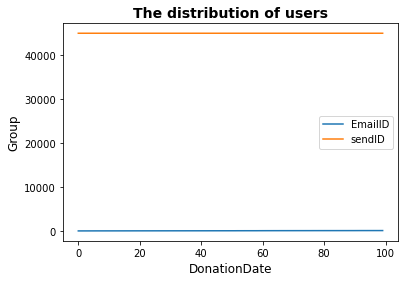

In [5]:
# Plotting the distribution of control and treatment groups and their donation dates 

ax = abtest.head(100).plot()
plt.title("The distribution of users", fontweight="bold", size=14)
plt.xlabel("DonationDate", size=12)
plt.ylabel("Group", size=12)
plt.show()

In [6]:
#Check how many duplicated users exist
# Some users donated on multiple days, so no actual duplicates

print(abtest["EmailID"].count())
print(abtest["EmailID"].nunique())

print(abtest["sendID"].count())
print(abtest["sendID"].nunique())

57495
35293
57495
2


In [7]:
#Show the % split between users who saw email A and email B
#Calculate pooled probability
mask = (abtest["Group"] == "Control")
donations_control = abtest["sendID"][mask].sum()
total_donations_control = abtest["sendID"][mask].count()

mask = (abtest["Group"] == "Treatment")
donations_treatment = abtest["sendID"][mask].sum()
total_donations_treatment = abtest["sendID"][mask].count()

print("Split of control users who saw email B vs treatment users who saw email A: ", 
          round(total_donations_control / abtest["sendID"].count() * 100, 2), "% ",
          round((total_donations_treatment / abtest["DonationDate"].count()) * 100, 2), "%")

#count number of users who donated in each group
print("Number of control users who donated after receiving email B: ", donations_control)
print("Percentage of control users who donated after receiving email B: ", round((donations_control / total_donations_control) * 100, 2), "%")

mask = (abtest["Group"] == "Treatment")
print("Number of treatment users who donated after receiving email A: ", donations_treatment)
print("Percentage of treatment users who donated after receiving email A: ", round((donations_treatment/ total_donations_treatment) * 100, 2), "%")

Split of control users who saw email B vs treatment users who saw email A:  49.79 %  50.2 %
Number of control users who donated after receiving email B:  1285871535
Percentage of control users who donated after receiving email B:  4491500.0 %
Number of treatment users who donated after receiving email A:  1296455424
Percentage of treatment users who donated after receiving email A:  4491600.0 %


#### Results 5 decimal places too far to right, not sure how to fix this error. Adjusting for rest of task

### Test Parameters 

In [8]:
#Check what sample size is required
practical_significance = 0.01 #user defined
confidence_level = 0.05 #user defined, for a 95% confidence interval
sensitivity = 0.8 #user defined

### A/B Testing 

In [9]:
#Calculate pooled probability
prob = (abtest["Group"] == "Control")
donations_control = abtest["sendID"][prob].sum()
total_donations_control = abtest["sendID"][prob].count()

prob = (abtest["Group"] == "Treatment")
donations_treatment = abtest["sendID"][prob].sum()
total_donations_treatment = abtest["sendID"][prob].count()

prob_pooled = (donations_control + donations_treatment) / (total_donations_control + total_donations_treatment)

print(prob_pooled)

44915.502043727065


In [10]:
#Calculate pooled standard error and margin of error
se_pooled = math.sqrt(44915.502043727065 * (1 + 44915.502043727065) * (1 / total_donations_control + 1 / total_donations_treatment))
z_score = st.norm.ppf(1 - confidence_level / 2)
margin_of_error = se_pooled * z_score

#Calculate dhat, the estimated difference between probability of conversions in the experiment and control groups
d_hat = (donations_treatment / total_donations_treatment) - (donations_control / total_donations_control)

#Test if we can reject the null hypothesis
lower_bound = d_hat - margin_of_error
upper_bound = d_hat + margin_of_error

if practical_significance < lower_bound:
    print("Reject null hypothesis")
else: 
    print("Do not reject the null hypothesis")
    
print("The lower bound of the confidence interval is ", round(lower_bound * 100, 2), "%")
print("The upper bound of the confidence interval is ", round(upper_bound * 100, 2), "%")



Do not reject the null hypothesis
The lower bound of the confidence interval is  -73330.3 %
The upper bound of the confidence interval is  73530.3 %


In [11]:
#Calculate t-test statistic and p-value 

from scipy import stats
rvs1 = stats.norm.rvs(loc = 2,scale = 10,size = 28865)
rvs2 = stats.norm.rvs(loc = 2,scale = 10,size = 28630)
print ("The t-test results and p-value are:", stats.ttest_ind(rvs1,rvs2))

The t-test results and p-value are: Ttest_indResult(statistic=-0.19534656651837162, pvalue=0.8451223347114913)


In [12]:
#Changed group values to numbers for visual representation 

body = client_71dba5ad40024717b35ee6d7f904e2f1.get_object(Bucket='abtestingtask2-donotdelete-pr-aj35rvdprvmpyr',Key='final_abtest_num.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,EmailID,sendID,DonationDate,Group
0,1,44915,11/1/20 0:00,1
1,2,44916,11/1/20 0:00,0
2,4,44916,11/6/20 0:00,0
3,4,44916,11/1/20 0:00,0
4,7,44915,11/1/20 0:00,1


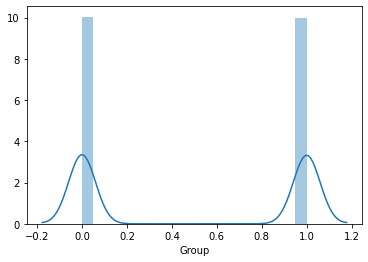

In [13]:
#Visual representation of groups

sns.distplot(df.Group)

# Results 

### Results from the A/B test were not found to be statistically significant, meaning a winner could not be determined based off the results. The null hypothesis (there is no difference between the donation activity between users who received the A and B emails) was not rejected due to the p-value being above the defined level of significance, .01. 

### To be able to determine a winner and make the test statistically significant, the significance level, confidence levels, or sample size could be adjusted for an aditional test. 